1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.
  
- **Answer:**  
  - **K-Means**: A partition-based clustering algorithm that requires the number of clusters `k` to be defined beforehand. It iteratively assigns points to the nearest cluster centroid and updates centroids until convergence. It is efficient for large datasets but sensitive to initial centroid selection.  
  - **Hierarchical Clustering**: A tree-based clustering method that does not require the number of clusters upfront. It builds a dendrogram by either merging clusters (agglomerative) or splitting them (divisive). It is more interpretable but computationally expensive for large datasets.  
  - **Use Cases**:  
    - *K-Means*: Customer segmentation in retail to group buyers based on purchasing behavior.  
    - *Hierarchical Clustering*: Document similarity analysis where the hierarchy of topics is useful.  

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.
- **Answer:**  
  The **Silhouette Score** measures how well each point fits within its assigned cluster compared to other clusters. It ranges from **-1 to 1**:  
  - Close to **1** → Data point is well-clustered.  
  - Close to **0** → Data point is on the boundary between clusters.  
  - Close to **-1** → Data point is misclassified.  
  It helps in evaluating the quality of clusters and comparing different clustering results.  

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?  
- **Answer:**  
  - **eps (ε)**: The maximum distance between two points to be considered neighbors. Smaller values → more clusters; larger values → fewer clusters.  
  - **min_samples**: The minimum number of points required to form a dense region (cluster). Higher values → stricter cluster formation.  
  - These parameters control how DBSCAN identifies core points, border points, and noise (outliers).  

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?
- **Answer:**  
  Clustering algorithms rely on **distance measures (e.g., Euclidean distance)**. If features have different scales (e.g., age in years vs. income in lakhs), the feature with larger values will dominate the distance calculation.  
  - **Without scaling** → biased clustering results.  
  - **With scaling (Standardization/Normalization)** → ensures all features contribute equally.  

5.  What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?
- **Answer:**  
  The **Elbow Method** helps find the optimal number of clusters by plotting the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters `k`.  
  - As `k` increases, WCSS decreases.  
  - At some point, the rate of decrease sharply slows down, forming an “elbow” shape.  
  - This **elbow point** indicates the best trade-off between minimizing WCSS and avoiding too many clusters, hence suggesting the optimal `k`.
  
   


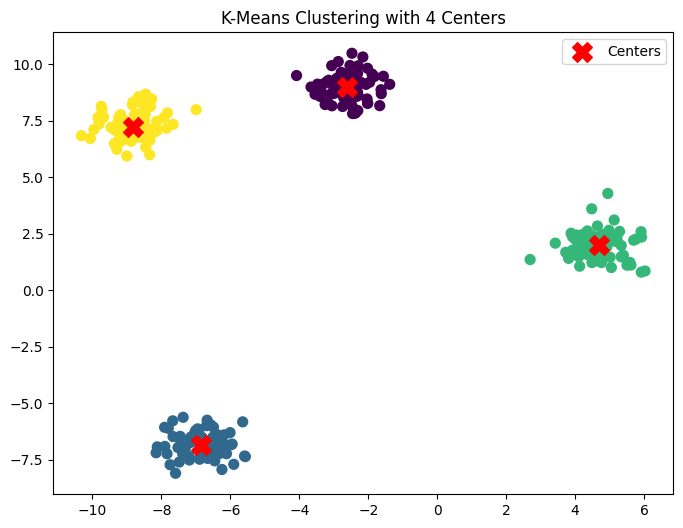

In [1]:
"""Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.
Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers."""


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Step 3: Get cluster labels and centers
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 4: Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")
plt.title("K-Means Clustering with 4 Centers")
plt.legend()
plt.show()


In [2]:
"""
Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).

"""
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # parameters can be tuned
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise label = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


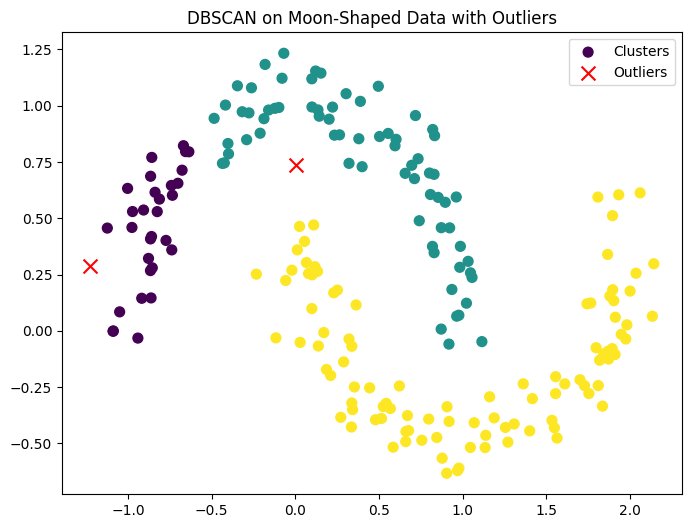

In [5]:
"""
Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
"""

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # parameters can be tuned
labels = dbscan.fit_predict(X)

# Step 3: Plot results
plt.figure(figsize=(8,6))

# Clustered points
plt.scatter(X[labels != -1, 0], X[labels != -1, 1],
            c=labels[labels != -1], cmap="viridis", s=50, label="Clusters")

# Outliers (label = -1)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
            c="red", s=100, marker="x", label="Outliers")

plt.title("DBSCAN on Moon-Shaped Data with Outliers")
plt.legend()
plt.show()


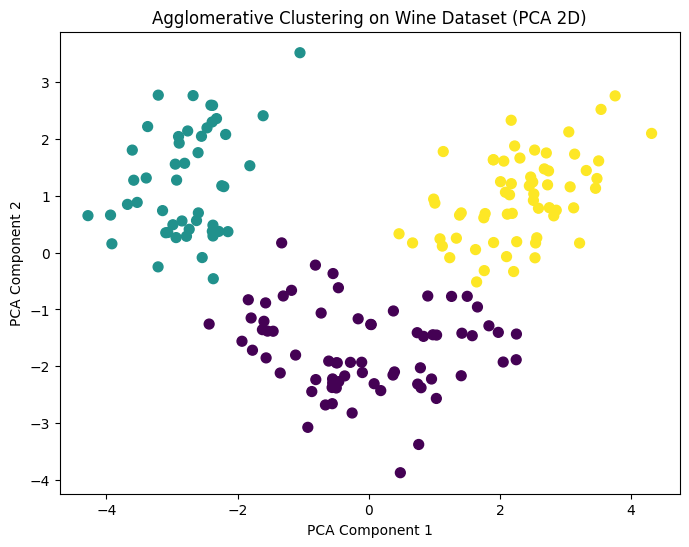

In [4]:
"""
Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

"""

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # choose 3 clusters for visualization
labels = agg.fit_predict(X_pca)

# Step 5: Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior.  

- **Answer:**  

1. **Choice of Clustering Algorithm(s):**  
   - I would start with **K-Means** because it is efficient for large datasets and works well with customer segmentation.  
   - I would also test **DBSCAN** (to detect outlier customers with unusual purchasing behavior) and **Hierarchical Clustering** (to visualize customer relationships via dendrograms).  

2. **Data Preprocessing Steps:**  
   - **Handle Missing Values:**  
     - Impute missing demographics (e.g., age, income) using median or mean.  
     - For categorical variables (e.g., gender, region), use mode or create a separate "unknown" category.  
   - **Encoding Categorical Variables:** Convert categorical data (e.g., region, product category) into numerical form using One-Hot Encoding.  
   - **Feature Scaling:** Apply **StandardScaler or MinMaxScaler** to ensure all features (e.g., income, purchase frequency, spending amount) contribute equally, since clustering depends on distance.  

3. **Determining the Number of Clusters:**  
   - Use the **Elbow Method** to find the point where increasing `k` provides diminishing returns in reducing WCSS.  
   - Validate with the **Silhouette Score** to check cluster quality.  
   - Cross-check with **business context** (e.g., does 3 clusters = budget, regular, premium customers make sense?).  

4. **Marketing Team Benefits:**  
   - **Targeted Promotions:**  
     - High spenders → premium offers, loyalty programs.  
     - Occasional buyers → discounts to increase frequency.  
     - Price-sensitive customers → budget deals.  
   - **Personalized Campaigns:** Each cluster receives tailored product recommendations and marketing messages.  
   - **Customer Retention:** Identify at-risk clusters (low engagement, declining purchases) and apply retention strategies.  
   - **Business Insights:** Understand purchasing patterns across demographics and regions to guide product stocking and advertising strategies.  

 This workflow ensures the company can leverage **data-driven customer segmentation** to improve conversion rates, customer satisfaction, and overall revenue.  
